# **Task 1: Term Deposit Subscription Prediction (Bank Marketing)**

## **Problem Statement and Objective**

The objective is to predict whether a bank customer will subscribe to a term deposit based on data from a marketing campaign. This involves building classification models to identify potential subscribers, evaluating their performance, and using explainable AI techniques to interpret predictions. This task helps in understanding customer behavior and improving marketing strategies.

## **Dataset Description and Loading**

The dataset is the Bank Marketing Dataset from the UCI Machine Learning Repository. It contains 45,211 instances with 17 attributes, including demographic information (age, job, marital status), financial details (balance, loan), campaign details (contact type, day, month, duration), and previous outcomes.

In [5]:
import pandas as pd

# Load the dataset
df = pd.read_csv('bank-full.csv', sep=';')  # Separator is ';'

# Display first few rows
print(df.head())

## Dataset info
# print(df.info())
# print(df.describe())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


## **Data Cleaning and Preprocessing**

 - Check for missing values: None in this dataset.
 - Handle categorical variables: Use one-hot encoding for nominal features (job, marital, education, contact, month, poutcome) and binary encoding for   - yes/no features (default, housing, loan, y).
 - Scale numerical features if needed, but for tree-based models, it's optional.
 - Balance the classes if imbalanced (subscriptions are ~11% yes).

In [6]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

# Binary encode yes/no columns
binary_cols = ['default', 'housing', 'loan', 'y']
le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

# One-hot encode categorical columns
categorical_cols = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Split features and target
X = df.drop('y', axis=1)
y = df['y']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## **Exploratory Data Analysis (EDA)**

 - Distribution of target: Imbalanced, with ~89% no and 11% yes.
 - Age distribution: Mean ~41, skewed right.
 - Duration vs. subscription: Longer calls correlate with yes.
 - Job types: Management and blue-collar are common.

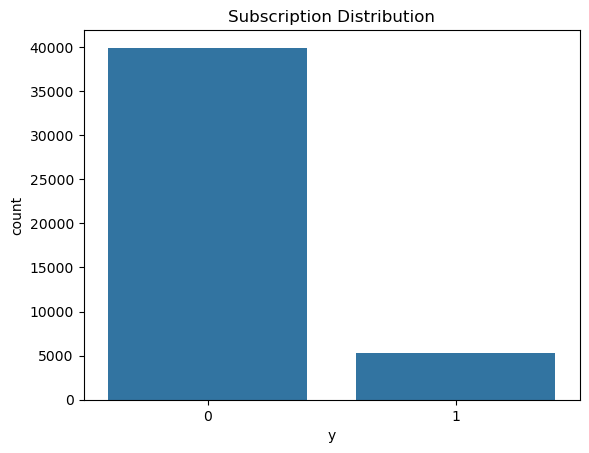

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Target distribution
sns.countplot(x='y', data=df)
plt.title('Subscription Distribution')
plt.show()


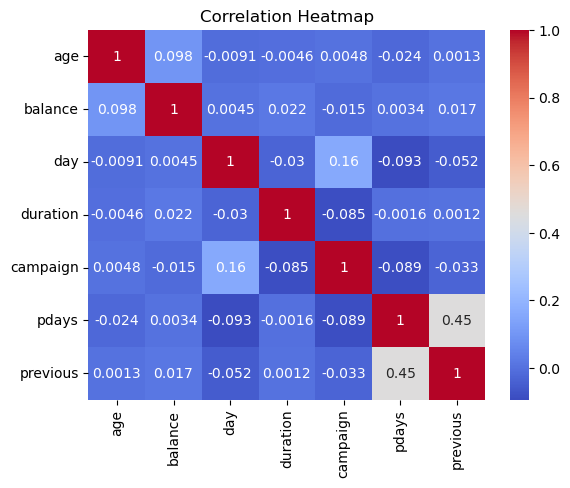

In [9]:
# Correlation heatmap (numerical features)
num_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


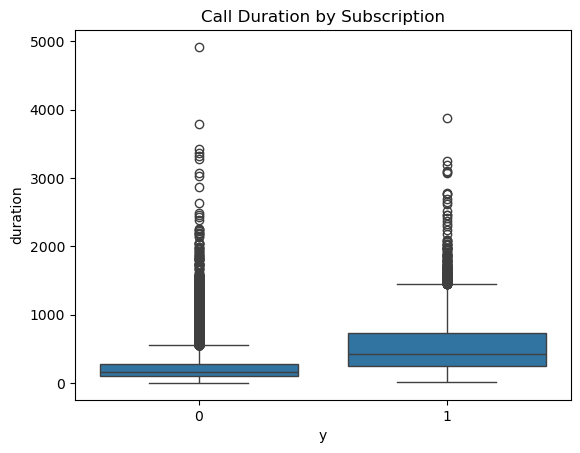

In [10]:

# Boxplot for duration by subscription
sns.boxplot(x='y', y='duration', data=df)
plt.title('Call Duration by Subscription')
plt.show()

## **Model Building and Evaluation**

Train Logistic Regression and Random Forest. Evaluate with Confusion Matrix, F1-Score, ROC Curve.

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, auc, classification_report

# Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print('Logistic Regression Classification Report:\n', classification_report(y_test, y_pred_lr))
print('F1-Score:', f1_score(y_test, y_pred_lr))


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      7985
           1       0.64      0.33      0.44      1058

    accuracy                           0.90      9043
   macro avg       0.78      0.65      0.69      9043
weighted avg       0.88      0.90      0.89      9043

F1-Score: 0.4392059553349876


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


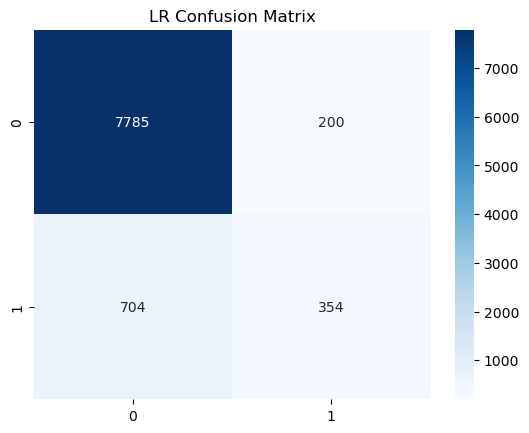

In [14]:
# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('LR Confusion Matrix')
plt.show()



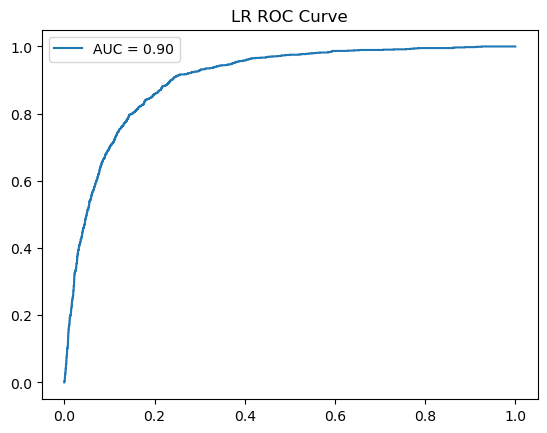

In [15]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.title('LR ROC Curve')
plt.legend()
plt.show()



Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      7985
           1       0.67      0.39      0.49      1058

    accuracy                           0.91      9043
   macro avg       0.79      0.68      0.72      9043
weighted avg       0.89      0.91      0.89      9043

F1-Score: 0.49375371802498513


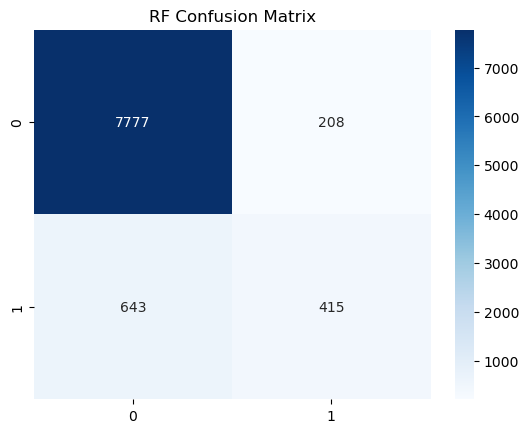

In [17]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print('Random Forest Classification Report:\n', classification_report(y_test, y_pred_rf))
print('F1-Score:', f1_score(y_test, y_pred_rf))

cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('RF Confusion Matrix')
plt.show()


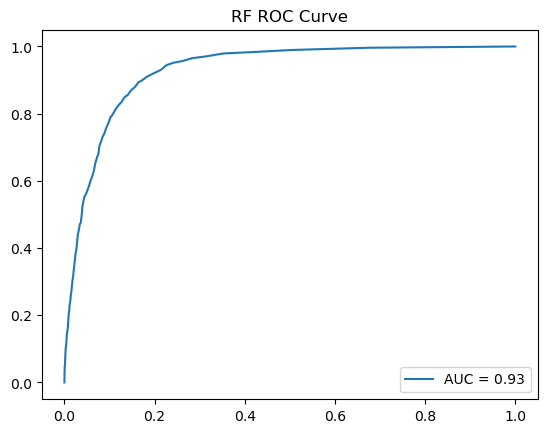

In [18]:
fpr, tpr, _ = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.title('RF ROC Curve')
plt.legend()
plt.show()

## **Visualizations**

As above: Countplot, heatmap, boxplot, confusion matrices, ROC curves.

## **Explaination**

In [22]:
import shap

# SHAP for Random Forest (using a sample for efficiency)
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test.iloc[:100])  # First 100 for demo

# Fix possible extra column in shap_values[1]
if shap_values[1].shape[1] != X_test.shape[1]:
    shap_values[1] = shap_values[1][:, :X_test.shape[1]]

# Summary plot
shap.summary_plot(shap_values[1], X_test.iloc[:100])  # For class 1 (yes)

# Explain 5 individual predictions
shap.initjs()
for i in range(5):
    display(shap.force_plot(
        explainer.expected_value[1],
        shap_values[1][i, :],
        X_test.iloc[i, :]
    ))


AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.